## __Speech to Text Module__

In [1]:
from datasets import load_dataset
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

/home/marcel/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = librosa.load("barcelona_JuanNuez_m70566_a87310_audio_converted.mp3", sr=16000)
x

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.5892538e-06, -2.0908847e-06,  0.0000000e+00], dtype=float32),
 16000)

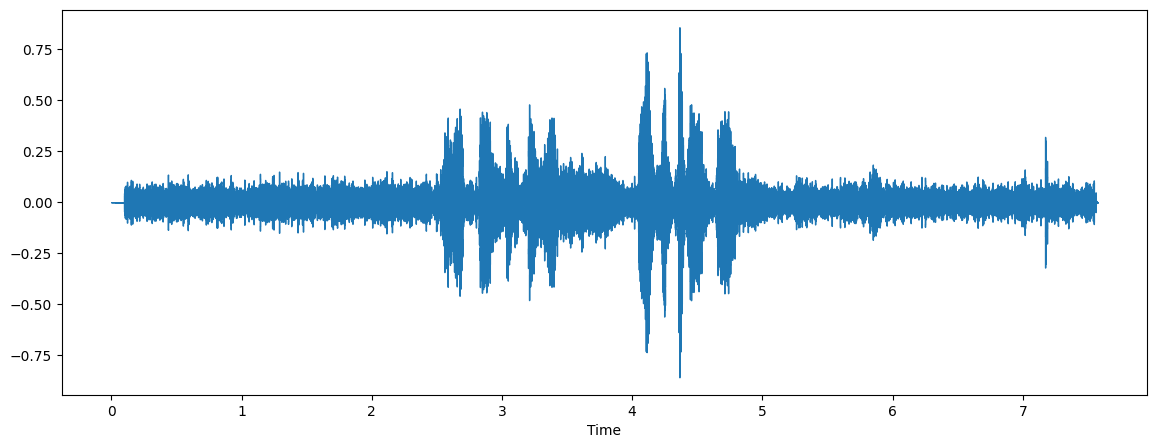

In [3]:
%matplotlib inline

plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveshow(x[0], sr=16000)

In [4]:
waveform = x[0]
sampling_rate = x[1]

In [5]:
# Load the Whisper model in Hugging Face format:
processor = WhisperProcessor.from_pretrained("clu-ling/whisper-large-v2-spanish")
model = WhisperForConditionalGeneration.from_pretrained("clu-ling/whisper-large-v2-spanish")

In [6]:
# Use the model and processor to transcribe the audio:
input_features = processor(
    waveform, sampling_rate=sampling_rate, return_tensors="pt"
).input_features

# Generate token ids
predicted_ids = model.generate(input_features)

# Decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)

transcription[0]

2024-03-07 15:15:54.561838: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 15:15:55.254975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 15:15:55.255152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 15:15:55.400319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 15:15:55.700325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

'bueno, pues estamos en el centro comercial.'

## __Transcription Preprocessing Module__

In [7]:
import nltk
from typing import List
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import spacy

/home/marcel/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2024-03-07 15:16:42.131262: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
def preprocess(text: str) -> List[str]:

    nlp, curr = spacy.load('es_core_news_sm'), text

    curr = curr.lower() # All elements from the string become lower case
    curr = word_tokenize(curr) # Tokenization of the corpus
    curr = [token for token in curr if not re.compile(r'[^\w\s]').match(token)] # Punctuation removal
    curr = [token for token in curr if token.lower() not in set(stopwords.words('spanish'))] # Stop words removal
    curr = [token.lemma_ for token in nlp(' '.join(curr))] # Lemmatization
    curr = [token for token in curr if not token.isnumeric()]

    return curr

In [9]:
tok_transcription = preprocess(transcription[0])
tok_transcription

['bueno', 'pues', 'centro', 'comercial']

## __Embeddings Module__

In [10]:
from gensim.models.keyedvectors import KeyedVectors
import numpy as np

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [11]:
wordvectors_file_vec = 'embeddings-xs-model.vec'
cantidad = 100000
embeddings_mapping = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [12]:
def find_average_embedding(tokenized_text: List[str]) -> np.array:

    embeddings = []

    for token in tokenized_text:

        if token in embeddings_mapping:

            embedding = embeddings_mapping[token]
            
            embeddings.append(embedding)
        
    average_embedding = np.mean(embeddings, axis=0)
        
    return average_embedding

In [13]:
average_embedding_transcription = find_average_embedding(tok_transcription)
average_embedding_transcription

array([-0.24994576,  0.5949025 , -1.152735  ,  0.2942225 , -0.020765  ,
        0.46438503, -0.19519001, -0.476969  ,  0.26342803, -0.02051999],
      dtype=float32)

In [14]:
tags_text = "_optical walls (1 participante) #feira #caldodecana #vilaclementino #sons (1 participante) #Feiradeacessibilidade (1 participante) #praça Benedito Calixto (1 participante) 25 novembre (1 participante) 4 patas pelo mundo (1 participante) 7 anjos (1 participante) a bordo del Albert (1 participante) a Paulista é nossa (1 participante) abbandonati (1 participante) abandonment (2 participantes) abuso (1 participante) ação cidadão (1 participante) ação saúde (1 participante) academies (1 participante) accenti (1 participante) accesibilidad (26 participantes) accesibilidad parada de autobuses múltiple 10 autobuses paran aquí (1 participante) accesible (28 participantes) acceso accesible (1 participante) disabled access (1 participante) aceras (11 participantes) aceras anchas (1 participante) acesso (1 participante) acesso ao piso superior (1 participante) acesso centro cultural metrô (1 participante) ache contemporânea (1 participante) acidentes (1 participante) high water (2 participantes) acquazzone (1 participante) adeveb (1 participante) adolescentes (1 participante) adoquines (2 participantes) aeroporto (1 participante) crowds (2 participantes) affollato (1 participante) affreschi (1 participante) afragola (1 participante) agência correio (1 participante) agevolazioni (1 participante) aglomeración (1 participante) agradable (1 participante) agradecimento (2 participantes) agua (46 participantes) agua potable (2 participantes) agujero (1 participante) aiuola (1 participante) ajudantes (1 participante) akimatsuri (1 participante) alambres (1 participante) alameda (3 participantes) alda (1 participante) villages (1 participante) railway (1 participante) aldgate underground (1 participante) alegria (1 participante) além do limite (1 participante) alerta (1 participante) alex Flemming (2 participantes) alimentari (1 participante) alimentos orgânicos (1 participante) alta velocidade (1 participante) altalena (1 participante) altar dos mortos (1 participante) altarino (1 participante) altstadt (1 participante) amazonia (1 participante) ambiente sonoro (100 participantes) ambiente sonoro (6 participantes) ambienti notturni (1 participante) ambientr sonoro (1 participante) ambiguità (1 participante) ambulantes sobre o piso tatil (1 participante) ambulanti (1 participante) amicizie (1 participante) amigos (3 participantes) amigos pra valer (1 participante) amilcar de Castro (1 participante) amizadeantigas (1 participante) amizadesnovas (1 participante) love (3 participantes) love (1 participante) amplitud (1 participante) andamios (2 participantes) halts (1 participante) andenes (4 participantes) antibodies (1 participante) touching (1 participante) angélica (1 participante) angolo con gatti e natura (1 participante) anhangabaú (1 participante) animación (1 participante) animals (1 participante) animali notturni (1 participante) anni 90 (1 participante) antiestresse (1 participante) antigo Mappin (1 participante) antiquariato (1 participante) antiquario (1 participante) antoni Abad (1 participante) antonio Machado (1 participante) aos domingos (1 participante) aosta (2 participantes) aparcamientos (1 participante) aparcamientos accesibles (5 participantes) aperitivi (1 participante) aperitivo (1 participante) aplicativo (1 participante) apoio local (1 participante) tempting (3 participantes) aprendizado diversão (1 participante) apresentações (1 participante) araraquara/SP (1 participante) árbol (1 participante) árboles (19 participantes) árboles monumentales (1 participante) architetture (1 participante) arcos (5 participantes) area (1 participante) área comercial (1 participante) area di sosta (1 participante) sand (2 participantes) arepa (1 participante) armazem Secos e Molhados (1 participante) smell (1 participante) arpa (1 participante) arquitectura (5 participantes) arquitetura (2 participantes) arsenale (2 participantes) art Concierge (1 participante) arte (19 participantes) street art (1 participante) arte Concierge (1 participante) arte contemporânea (4 participantes) arte público (3 participantes) arte Tátil (1 participante) artecontemporanea (1 participante) artesanato na Paulista (1 participante) artesanía (2 participantes) artista (1 participante) artista de rua (2 participantes) árvores (2 participantes) asac (1 participante) ascessibilidade (1 participante) asociaciones (1 participante) aspecto general (1 participante) waiting (1 participante) assesorato alle politiche sociali (1 participante) associação Baiana de imprensa. Salvador. Bahia. (1 participante) associação cadevi (1 participante) associazione (1 participante) atarazanas (1 participante) atardecer (1 participante) atardecer en Av peru (1 participante) atencao (1 participante) atrakcje (1 participante) attenzione scalini (1 participante) attese (1 participante) attracco (1 participante) attraversamenti (1 participante) attraversamento (1 participante) attraversamento pedonale (1 participante) atualidade (1 participante) audiodescrição (1 participante) audioguías (1 participante) audiolibros (1 participante) auditório (1 participante) auditorium (1 participante) recording (1 participante) auguri (1 participante) aula (1 participante) aula online (1 participante) auladeforró (1 participante) aule (1 participante) ausruhen (1 participante) auto teste (1 participante) autobús (21 participantes) autonomia (1 participante) avenida Paulista (2 participantes) avenida Paulista 200 (1 participante) ayuda (1 participante) ayuntamiento (1 participante) bäckerei (1 participante) backyards (1 participante) bagni publici (1 participante) bagno (1 participante) bahia (3 participantes) bahnhof (1 participante) bairro Olaria (1 participante) baixa visão (1 participante) bajorelieves (5 participantes) balaustra (1 participante) balconcino (1 participante) whale (1 participante) courtship (1 participante) bambino urlante (1 participante) banana (1 participante) banana split (1 participante) banche (1 participante) banks (4 participantes) banco Bradesco (1 participante) banco do Brasil (1 participante) bancos (13 participantes) banda (1 participante) banderes (1 participante) banhado de SJCampos (1 participante) banks (2 participantes) bar carizzi (1 participante) bar witek (1 participante) barandillas (1 participante) barbiere (1 participante) boats (3 participantes) mooring steps (16 participantes) barcas (7 participantes) barcelona (1 participante) barcos (1 participante) bares (24 participantes) barra Funda (1 participante) barreiras (1 participante) barreras arquitectónicas (1 participante) barriera (1 participante) barriere (1 participante) barrio (1 participante) basalto (1 participante) basilica (1 participante) basilica frari (1 participante) basketball (3 participantes) battello 4.1 (1 participante) battello 5 (1 participante) BB9 (1 participante) beleza (1 participante) bellezza (1 participante) bengala (3 participantes) benvenuti (1 participante) advisory (1 participante) letters and wallpaper area (1 participante) food hall (1 participante) berlin (1 participante) berlin Wall (1 participante) berlin Gallery (2 participantes) biblioteca braille (1 participante) biblioteca Louis Braille (1 participante) biblioteca Mario dd Andrade (1 participante) biblioteca tolentini (1 participante) bibliotecas (16 participantes) bicchieri (1 participante) bicicleta (1 participante) bicicletas (5 participantes) ladybug (2 participantes) bienales (13 participantes) bienestar (1 participante) BIKE TOUR SP (1 participante) bimari (1 participante) bispo do Rosário (1 participante) black Music (1 participante) blind (1 participante) blind guided tour (1 participante) blind.wiki (1 participante) blind self-help (1 participante) blindwikibr (1 participante) blindwiky (1 participante) blog (1 participante) blue moon (1 participante) bluszcz (1 participante) błoto (1 participante) boat (1 participante) boisko (1 participante) bolardos (2 participantes) bolsas Japanhouse cultura (1 participante) bookshop (1 participante) bordados (1 participante) borse (1 participante) bos (1 participante) bosque (2 participantes) botánico (1 participante) botánico primera parte (1 participante) bottega.forcole.remi# (1 participante) bow (1 participante) bracarizi (1 participante) braille (7 participantes) brak biedy (1 participante) brak przejscia (1 participante) no pedestrian access (1 participante) brama Oławska (1 participante) bransdesburg Gates (1 participante) brandenburg Gate (1 participante) brasil (4 participantes) brasil restaurante (1 participante) brechobocapreta @bocapreta_ (1 participante) bricoMarche Nowa-Ruda-Słupiec (1 participante) brincadeira (1 participante) bronze (1 participante) BSBH (1 participante) bucato (1 participante) bühlstr & Humboldtallee traffic lights crossing Ampel Autos Fahrräder (1 participante) building (1 participante) darkness (2 participantes) bulerías (1 participante) bustle (2 participantes) buraco (1 participante) buracos (1 participante) burloni (1 participante) bus stops (3 participantes) but good (1 participante) bw/EDU (1 participante) ca foscari (1 participante) ca' Dario (1 participante) so dark (4 participantes) cabanyal (6 participantes) cabina telefónica (2 participantes) cachoeira do Corrdgo da Caixa dAgua Trilha Ecologica Parque Natural Municipal Basalto (1 participante) cactus (1 participante) cadeirantes (1 participante) cadenas (1 participante) cadevi (1 participante) café (9 participantes) cafeterías (12 participantes) cafezinho (1 participante) caFoscari (1 participante) cajas de fruta (1 participante) cajeros automáticos (3 participantes) calçada (1 participante) calçadas (1 participante) caldo de cana (3 participantes) water ending streets (26 participantes) narrow streets (3 participantes) calles (5 participantes) calles para todos (10 participantes) calles sin salida (12 participantes) calles venecianas (10 participantes) calli vuote (1 participante) quietness (3 participantes) hot (1 participante) caminhada (1 participante) caminho (1 participante) caminhões (1 participante) caminhos musicais (1 participante) camini (1 participante) camino de santiago (1 participante) caminos (1 participante) cammino (1 participante) camp de futbol (1 participante) campanas (20 participantes) campanella (1 participante) campanello (1 participante) campanha gota eficiente (1 participante) campiello mosca (1 participante) campiello san Rocco pozzo fontana (1 participante) campo da basket (1 participante) tennis courts (1 participante) campo de fútbol (1 participante) campo Santa Margherita (2 participantes) campus (1 participante) campus niversitarios (1 participante) canal motoboy (1 participante) canales venecianos (16 participantes) cancello (1 participante) candidatos (1 participante) cane (1 participante) cani (1 participante) cantando e encantando (1 participante) cante (1 participante) canti (1 participante) cantiere (1 participante) cantiere di gondole e barche (1 participante) cantieri (1 participante) canto (3 participantes) cantora (1 participante) cão guia (3 participantes) capilla del Capitulet (1 participante) chapiters (4 participantes) car (1 participante) cara del moro (1 participante) carabinieri (1 participante) caraguatatuba (1 participante) prisons (2 participantes) carceri (1 participante) carlos (3 participantes) carlos # concentração (1 participante) carnaval (10 participantes) carolina Maria (1 participante) carolina Maria de Jesus (1 participante) carrancas (1 participante) carrello (1 participante) carrer ample Soroll Vent (1 participante) carrer ample (1 participante) carrers per tothom (1 participante) carreteras (1 participante) carril bici (1 participante) carriles de coches (1 participante) sign (1 participante) cartolibreria (1 participante) casa (1 participante) casa de cultura Rancho do Tropeiro Ernesto Vilela (1 participante) casa até laramara (1 participante) casa azul (1 participante) casa cor 35 anos (1 participante) casa da Troia (1 participante) casa das rosas (1 participante) casa del Tintoretto (1 participante) casa Modernista (4 participantes) casa rosada (1 participante) casa verde (1 participante) casarão casa das rosas (1 participante) casas (1 participante) casas antigas (1 participante) casas del Cabanyal (1 participante) old town (1 participante) barracks (1 participante) casino (1 participante) casita verde (1 participante) cassette postali (1 participante) cat (1 participante) cathedrals (3 participantes) cauce (1 participante) cauce del río (1 participante) cauce del río viejo puente de Viveros (1 participante) cautelat (1 participante) caveira símbolo de igualdade (1 participante) cegueira com produto químico (1 participante) celebração (1 participante) cemento (1 participante) center (3 participantes) center of the travelers (2 participantes) centri civici (1 participante) centro comercial (1 participante) centro cultural (1 participante) centro Cultural Itaú (1 participante) centro cultural São Paulo (3 participantes) centro cultural sp (7 participantes) centro Cultural Vergueiro (1 participante) centro de memória (1 participante) centro para Aline 2023 (1 participante) centro Universitário Facens (1 participante) centroculturalvergueiro (1 participante) centroparalímpicobrasileiro (1 participante) centros culturales (1 participante) centrum wolontariatu (1 participante) brewery (1 participante) cerveza (2 participantes) grass (2 participantes) cestini (1 participante) cestino (1 participante) chá de folha de amora (1 participante) chaflán (1 participante) chalé francês (3 participantes) chame francês (1 participante) chatka na jatkach (1 participante) cheirinho (1 participante) chiaro di luna (1 participante) chiesa dei frari (1 participante) children (1 participante) chill (1 participante) chiostri (1 participante) church (1 participante) churros (1 participante) churros com doce de leite (1 participante) cicale (1 participante) cicchetti (1 participante) cichy lowca (1 participante) cidade (1 participante) city of Culture (4 participantes) cidade Matarazzo (1 participante) cinegrafista cega (1 participante) cines (2 participantes) cinthia (1 participante) cioccolata (1 participante) cítricos (1 participante) citizen (1 participante) cloister (1 participante) claustros (3 participantes) clube homes (1 participante) CO Berlin (1 participante) coca de llanda (1 participante) cocas (1 participante) coches (16 participantes) cocina de bar (1 participante) coco de pombo (1 participante) coco natural (1 participante) cocô no piso tatil (1 participante) coffee breakfast bar (1 participante) college (1 participante) colegio de escolapios segunda parte (1 participante) colegio escolapios (1 participante) colégio Rodrigues Alves (1 participante) collegio (1 participante) colleoni (1 participante) colombi (1 participante) colores (1 participante) colors (2 participantes) colour (1 participante) columnas (6 participantes) comemoração (1 participante) comércio ambulante (2 participantes) comida (11 participantes) comida Árabe (1 participante) compañía (1 participante) compere (1 participante) complexo ferroviário (1 participante) complexo transportes coletivos Saccoman (1 participante) compostela (1 participante) compras (1 participante) compras navideñas (1 participante) comune Venezia (1 participante) comunicato stampa (1 participante) with cello (1 participante) conad (1 participante) concerti (1 participante) concerto (1 participante) concerto delle scuole medie di Urbino (1 participante) concerts (3 participantes) condomínio nacional (1 participante) confine (1 participante) conservatorio (1 participante) construcao do mundo (1 participante) contenedores (1 participante) contrabando (1 participante) convent (1 participante) conversaciones (1 participante) convivenza (1 participante) conzafelsi (1 participante) coordenadora do educativo MAM (1 participante) copisteria (1 participante) corde (1 participante) corderie (1 participante) corrego da Caixa dAgua parque natural municipal basalto (1 participante) cut (1 participante) corte interna (1 participante) covardia (1 participante) cozinheira (1 participante) cpb (1 participante) cracolandia (1 participante) creazioni (1 participante) crocefisso (1 participante) intersections (4 participantes) crociera (1 participante) croquetas (1 participante) crossing cars bikes pedestrians traffic lights (1 participante) cruce con carril bici (1 participante) cruce con carril bicis (1 participante) cruces (2 participantes) cruzar (1 participante) cul-de-sac (1 participante) cultura (42 participantes) cultura accesible (1 participante) cumowanie (1 participante) cuoio (1 participante) cúpula del museo (1 participante) cura (1 participante) curiosidade (3 participantes) curiosidades (3 participantes) currywurst (1 participante) curta a paulista (1 participante) curve (1 participante) cyganka (1 participante) dąb (1 participante) dab wolnosci (1 participante) daisy (1 participante) dança (5 participantes) dancaderuapaulista (1 participante) dançanapaulista (1 participante) dançar (1 participante) danze (1 participante) dar voz (1 participante) docks (1 participante) death in Venice (1 participante) decorazioni (1 participante) defensa (1 participante) defibrillatore (1 participante) deficiência visual (1 participante) deficientes visuais (1 participante) deficientevisual (1 participante) dejetos (1 participante) memorials (1 participante) dentista (1 participante) dentrofora (1 participante) denúncia (1 participante) depoimento (1 participante) deportes (10 participantes) deposito (1 participante) derechos (1 participante) rest (1 participante) descripciones (3 participantes) environmental (1 participante) deslocamento (1 participante) detalhes Construtivos (1 participante) urban details (1 participante) deus (2 participantes) deutsch (1 participante) devotion (1 participante) dia nublado al lado del mar en el boulevard (1 participante) dialetto (1 participante) dica (1 participante) dicas de pontos turísticos (1 participante) difícil acessibilidade (1 participante) dificuldade (1 participante) dificuldades (1 participante) dipinti (1 participante) direção (1 participante) direzioni (1 participante) disabili (1 participante) disaster (1 participante) dischi (1 participante) disegni (1 participante) distanza (1 participante) distributore (1 participante) distrito Eugenio de Melo (1 participante) disturbo (1 participante) diversão (1 participante) diversidade (1 participante) diversidade na Paulista (1 participante) entertainment (1 participante) DJ na Paulista (1 participante) dobiegniew (1 participante) dobra (1 participante) doces (1 participante) documenta (1 participante) documentário Blind Wiki (1 participante) dolcezza (1 participante) dolci (1 participante) dom Quixote (1 participante) donne (1 participante) doposcuola (1 participante) dorenauil (1 participante) dorina Nowill (1 participante) dorinanowill (3 participantes) dormiente (1 participante) dornbusch (1 participante) dorsoduro (1 participante) drLluch (1 participante) drobiowa watrobka (1 participante) drug store (1 participante) drum (1 participante) dublagem presencial (1 participante) duomo (1 participante) big intersection (1 participante) duży ruch (1 participante) dworzec glowny (1 participante) dworzec Główny PKP (1 participante) dworzec PKS tymczasowy (1 participante) dzieci (1 participante) hole in the sidewalk (2 participantes) echo (4 participantes) ecologica (1 participante) newsstands (2 participantes) edificio (1 participante) edifício do Gazeta (1 participante) edifício gazeta (1 participante) edificio historico (1 participante) edificios (1 participante) edificios históricos (1 participante) educação Física (1 participante) education (2 participantes) eeuu (1 participante) eeuu>Israel (1 participante) church (1 participante) shopping in Berlin (1 participante) el capítulet (1 participante) eleições (1 participante) eliche (1 participante) elogios (1 participante) embarcaderos (3 participantes) emocao (1 participante) recommendations (1 participante) en el moving Jardín es (1 participante) en Valencia (1 participante) encontro (1 participante) enoteche (1 participante) ensaio (2 participantes) ensaios (1 participante) entone Abad (1 participante) entorno (8 participantes) inaccessible entrance (1 participante) entrada laramara (1 participante) entrance (3 participantes) entrance (3 participantes) interviews (2 participantes) entrevistas (2 participantes) eodoviaria (1 participante) erba (1 participante) erba alta (1 participante) erba fresca (1 participante) erba tagliata (1 participante) erfurt (1 participante) escada em espiral (1 participante) escaleras (13 participantes) escalones (9 participantes) escolarodriguesalves arquitetura (1 participante) escravos (1 participante) escritor (1 participante) escritório (1 participante) escucha (1 participante) engineering school (1 participante) escuelas (5 participantes) esculturas (10 participantes) esfirras (1 participante) espacio (1 participante) espacio abierto (7 participantes) espaço para shows (1 participante) espectaculo (1 participante) esplanada de gespa (1 participante) espositori mobili (1 participante) esposizioni (1 participante) esquemapreferido (1 participante) estação Barra Funda (1 participante) estação Belém (1 participante) estação Ferroviária Sorocabana (1 participante) estación del Norte (1 participante) estaciones de tren (20 participantes) estintore (1 participante) estropeado (1 participante) eugenio de Melo (1 participante) exclusão social (1 participante) exercise (1 participante) expectativas (1 participante) expedição (1 participante) experiences (2 participantes) experiência sensorial (1 participante) explorando barrios (11 participantes) exposição (3 participantes) exposição Itinerante (1 participante) exposición (1 participante) exposiciones (1 participante) exposições (4 participantes) facciata (1 participante) faces (1 participante) fachada tátil (1 participante) faculdade de comunicação (1 participante) faculdade Oswaldo Cruz (1 participante) fala povo (1 participante) falso peatonal (1 participante) falta de Acessibidade (1 participante) falta de acessibilidade (1 participante) falta de rampa para pessoa com cadeira de rodas (1 participante) falta pouco!!! (1 participante) família (1 participante) família socializadora (1 participante) families (1 participante) food (1 participante) pharmacies (5 participantes) farmacie (1 participante) farol sonoro (1 participante) farola (1 participante) fast food (1 participante) fastidii (1 participante) feast (1 participante) fegato (1 participante) feira (5 participantes) feira livre (3 participantes) feltrinelli (1 participante) feniks (1 participante) ferias (1 participante) stops (3 participantes) fermate (1 participante) fermate autobus (1 participante) fernsehen gucken (1 participante) ferro (1 participante) ferrovvia (1 participante) ferries (1 participante) festa (2 participantes) festival de Outono (1 participante) feuga (1 participante) fiera (1 participante) fiesp (2 participantes) finalmente (1 participante) finca roja De Valencia (1 participante) fiorai (1 participante) fiori (1 participante) first (1 participante) first aid (1 participante) fisarmonica (1 participante) fitness (1 participante) flamenco (1 participante) flea market (1 participante) flores (1 participante) fochanca (1 participante) foglie (1 participante) folla (1 participante) follia (1 participante) fondaco tedeschi (1 participante) streets along a canal (10 participantes) fondazione (1 participante) fondazione Benetton (1 participante) foundry (1 participante) fontane (1 participante) fontadamenta (1 participante) fontanna rynek (1 participante) forni (1 participante) fortune (2 participantes) foto (1 participante) photocopies (1 participante) fotografia (2 participantes) fotografias (1 participante) fotógrafo (1 participante) france (1 participante) francia (1 participante) franco (1 participante) french embassy (1 participante) frari (2 participantes) free Wi Fi (1 participante) frei caneca (1 participante) frenchurch street (1 participante) frenesia (1 participante) peace run (1 participante) frittelle (1 participante) fritto (1 participante) fritto di mare (1 participante) froiz (1 participante) frutas (1 participante) greengrocers (3 participantes) frytki (1 participante) fuentes (14 participantes) fuentes (14 participantes) fuera Puerto de Valencia (1 participante) fundaçãoDorina (1 participante) fundado por el padre jofre (1 participante) funlife (1 participante) furio (1 participante) fútbol (4 participantes) gabrielzinho manos crew (1 participante) gadget (1 participante) gaita (1 participante) piper (1 participante) galeria domikanska (1 participante) galeria Dominikanska (1 participante) galeria super variado (1 participante) galerie sztuki (1 participante) galetia 2001 (1 participante) galway (1 participante) garapa e lanches (1 participante) garden pubs (1 participante) garibaldi (1 participante) gastronomia (2 participantes) gatti (1 participante) gaviotas (6 participantes) GCM (2 participantes) secret (1 participante) gelateria (1 participante) icecream (3 participantes) gentrificación (1 participante) german (1 participante) giardini viale panchine (1 participante) giobbe (1 participante) giocare (1 participante) toys (1 participante) giocattolo (1 participante) games (4 participantes) gioco (1 participante) gioia (1 participante) giornata internazionale contro la violenza sulle donne (1 participante) carousels (2 participantes) giudecca (3 participantes) glicine (1 participante) golosinas (1 participante) gołębie (1 participante) gondola (4 participantes) gondola col tetto (1 participante) gondole con rilievo particolare (1 participante) gondolieri (1 participante) gorące paczki (1 participante) GOSTARIA DE PARTICIPAR COMO VOLUNTARIA NO PASSEIO DO MAN. (1 participante) gostosuras (1 participante) city game (1 participante) gradoni (1 participante) graffitis (1 participante) grajek (1 participante) grand Hotel Des Bains (1 participante) granie na trawie (1 participante) grátis (1 participante) great Tower Street (1 participante) green light (1 participante) gressan (1 participante) gretapower (1 participante) barbecue (1 participante) gródek (1 participante) grupo (1 participante) gruppo (1 participante) elderly group (1 participante) mushrooms (1 participante) guarda civil metropolitana (1 participante) guarda-chuva (1 participante) guarulhos (1 participante) guerra (1 participante) gueto (6 participantes) gufo (1 participante) guggenheim (2 participantes) guitars (1 participante) cucumbers (1 participante) gwizdanie (1 participante) chicken (1 participante) hala Targowa (1 participante) halo (1 participante) hałas (1 participante) hangdrum (1 participante) hare Krishna (1 participante) harmonijka (1 participante) hashtag vila Clementino hashtag feira baratos (1 participante) hebraica (1 participante) helados (1 participante) helat (1 participante) helicopter (1 participante) helpful staff (1 participante) hermitage (1 participante) hessischerRundfunk (1 participante) hierro (1 participante) historia (10 participantes) historia de Valencia (1 participante) historia del barrio Velluter (1 participante) historia hospital antiguo (1 participante) historia y arquitecto de la estación del Norte de Valencia (1 participante) histórias (1 participante) historias del Cabanyal (1 participante) histórico do projeto Blindwiki (1 participante) HIV (1 participante) hope (1 participante) hohenschönhausen (1 participante) holocaust Memorial (1 participante) wood (1 participante) home (1 participante) ovens (2 participantes) horta (1 participante) hospitais (1 participante) hospitals (3 participantes) hospital Santa Catarina (3 participantes) hospitalsanata Catarina avpaulista (1 participante) lodging house (1 participante) hostipal Santa Catarina (1 participante) hotel Monopol (1 participante) hotel San Elena (1 participante) hoteles (10 participantes) HR (1 participante) humanos (1 participante) humorista (1 participante) dogs (4 participantes) IA (1 participante) ibirapuera (1 participante) iglesia de Santa Lucía (1 participante) iglesias (30 participantes) igreja católica (1 participante) igreja Paroquia Imaculada Conceiçao (1 participante) igreja São Luiz Gonzaga (1 participante) churches (1 participante) iiaa (1 participante) IIT (1 participante) illustrations (1 participante) ilton (1 participante) imagine! (1 participante) imigração espanhola no Brasil (1 participante) impedimento (1 participante) printing (1 participante) impressioni (1 participante) impreza (1 participante) ims (1 participante) inaccesible (10 participantes) uncivil (1 participante) incívicos (4 participantes) inclusão (2 participantes) inconvenientes (1 participante) incrível (1 participante) restaurants (1 participante) restaurants (1 participante) railing (1 participante) info (1 participante) general info (1 participante) generic information (1 participante) informações sobre o piso tatil para os leigos (1 participante) information (2 participantes) início (1 participante) inicio de ruta (1 participante) instagram @blindwikibr (1 participante) instalaciones deportivas (2 participantes) instituto magnus (2 participantes) instituto Moreira Salles (2 participantes) instituto Paulistano (1 participante) institutes (1 participante) instrumentos musicais (1 participante) interação (1 participante) indoors (3 participantes) interview (1 participante) irish pubs (1 participante) iscrizione (1 participante) inscriptions (3 participantes) isole (1 participante) isoloto (1 participante) israele (1 participante) istituti (1 participante) italian (1 participante) italian forum (1 participante) restaurants (1 participante) italy (1 participante) itaú cultural (1 participante) IUAV (5 participantes) jail (1 participante) janela de vidro (1 participante) jantar (1 participante) japan House (10 participantes) japão (1 participante) jardim (1 participante) jardim das Esculturas (1 participante) jardim japonês (1 participante) jardim suspenso (1 participante) jardín botáncio (1 participante) botanical garden (1 participante) jardín botánico tercera parte (1 participante) jardineras (4 participantes) jardines (21 participantes) jardines sensoriales (4 participantes) jas i Malgosia (1 participante) jessica (1 participante) JHSP ACESSÍVEL (1 participante) jô Soares (1 participante) jornalismo (1 participante) jovens (1 participante) juan calzadilla (1 participante) judeus (1 participante) juego (1 participante) games (1 participante) jugos kerns (1 participante) juntos somos mais fortes (1 participante) jw.org (1 participante) kaczki (1 participante) kalambur (1 participante) kałuże są bo woda pasuje (1 participante) chameleons (1 participante) kamien (1 participante) kamiennogórska (1 participante) kantor (1 participante) karaokê (1 participante) chestnut avenue (1 participante) kino helios (1 participante) kiosks (1 participante) kiosk (2 participantes) kiosk Kioto (1 participante) church (1 participante) kit pronto soccorso (1 participante) sound installation (1 participante) clubs (2 participantes) kolejka (1 participante) konferencja (1 participante) kościół św. Wojciecha (1 participante) dwarves (5 participantes) kroki (1 participante) books (2 participantes) księgarnia (1 participante) works of art (7 participantes) orchards (1 participante) la muralla árabe (1 participante) la muralla cristiana (1 participante) la primera Once de Valencia (1 participante) la Roqueta (1 participante) labirinto (1 participante) ladeira da memória (1 participante) lake (2 participantes) lagoons (2 participantes) laguna sud (1 participante) laka (1 participante) lamenti (1 participante) lampione (1 participante) lampioni (1 participante) lanchonete (1 participante) lanchonete garoa Paulista (1 participante) lanzadora (1 participante) laramara (9 participantes) laraparque (1 participante) noise (1 participante) lato (1 participante) laundromats (1 participante) lavanderia (1 participante) leadenhall market (1 participante) lectures (1 participante) leggenda (1 participante) leggenda veneziana (1 participante) leone (1 participante) les arenas (1 participante) forestry (6 participantes) leyendas (3 participantes) bookshops (3 participantes) libreria acqua alta (1 participante) libros (5 participantes) liceo classico (1 participante) read (2 participantes) deck chair (1 participante) line 5 (1 participante) linee guida (1 participante) linha azul (1 participante) linha vermelha metro (1 participante) linha vermelha sp (1 participante) linhas ferrias (1 participante) literatura (1 participante) liverpool Street Station (1 participante) livraria (1 participante) lixo (2 participantes) lloros (1 participante) lluvia (6 participantes) local (2 participantes) locanda Fiore (1 participante) ice (2 participantes) lodz (1 participante) lodziarnia (1 participante) loggia dei cavalli (1 participante) lonja (1 participante) loucura (1 participante) luce-Prima (1 participante) luceprima (1 participante) luces (4 participantes) lula (1 participante) łucznicy (1 participante) macchinetta (1 participante) MACS (8 participantes) madera (3 participantes) madonna (1 participante) magazzino (1 participante) magic (2 participantes) model (1 participante) MAM (3 participantes) mamme (1 participante) manicômio (1 participante) manifestaciones (2 participantes) manoel Antonio Puig (1 participante) tactile map (1 participante) tactile maps (7 participantes) maquete (1 participante) máqui 1000 (1 participante) máquina expendedoras (1 participante) machinery (1 participante) sea (5 participantes) maraña (1 participante) marchinha da acessibilidade (1 participante) sea (6 participantes) marechal Deodoro (1 participante) margherite (1 participante) mariafumaca (1 participante) marie Curie (1 participante) marin faliero (1 participante) marina (1 participante) marble (1 participante) masp (1 participante) mata atlântica (1 participante) kill blind (1 participante) maths (1 participante) materiale (1 participante) mcdonalds (1 participante) MECO (1 participante) doctors (2 participantes) medida (1 participante) meios de transporte (1 participante) meksyk (1 participante) memoerial 5 (1 participante) memória (1 participante) memorial (5 participantes) memorial America Latina (2 participantes) memorial da América latina (5 participantes) memorie (1 participante) mensagem (1 participante) mequi 1000 (2 participantes) mequi1000 (1 participante) mercat (1 participante) mercat central (1 participante) mercatino (1 participante) markets (6 participantes) mercato del pesce (4 participantes) merci (1 participante) snack (1 participante) mesas (1 participante) mestre (1 participante) metro (4 participantes) metrôcarrão (1 participante) michael Jackson (1 participante) microfono (1 participante) MIDI (1 participante) mienice miejsce-na-ognisko (1 participante) militari (1 participante) milladoiro (1 participante) mimoo (1 participante) minhocão (2 participantes) miniatury (1 participante) minorías EC3 (1 participante) blackbirds (1 participante) mislata (1 participante) missa (1 participante) mobiliario urbano (4 participantes) mobilidade (2 participantes) model building (1 participante) mogi das cruzes (1 participante) molesto (1 participante) moli (1 participante) money (1 participante) monopatines (1 participante) monopattino (1 participante) monument underground station (1 participante) monumentos (10 participantes) morador de rua (1 participante) moradores de rua (1 participante) morango (2 participantes) more London (1 participante) moreira Salles (2 participantes) mori (1 participante) morro (1 participante) morta (1 participante) morte a Venezia (1 participante) moscowneversleeps (1 participante) most zakochanych (1 participante) motos (2 participantes) motos subiendo cuesta (1 participante) motosega (1 participante) motion (1 participante) muchomory (1 participante) mulino Stucchi (1 participante) multi direzionali (1 participante) multidirezionale (2 participantes) multidirezionalità (1 participante) multietnicità (1 participante) mundogelado (1 participante) murales (1 participante) murano (1 participante) muretti (1 participante) muretto in pietra d'istria (1 participante) muro mattoni (1 participante) muros (1 participante) muros de piedra (1 participante) muros provisionales (4 participantes) museo arroz (1 participante) museo Blasco Ibañez (1 participante) museo ca' rezzonico (1 participante) museo del arroz (4 participantes) museo della music (1 participante) museo Muving (1 participante) museos (6 participantes) museu (1 participante) museu da imigração (1 participante) museu da Inclusão (1 participante) museu de arte contemporânea de Sorocaba (1 participante) museu de Arte Moderna da Bahia (1 participante) museu de Arte Sacra (1 participante) museu do Amanhã (1 participante) museu do folclore (1 participante) museu liceo pasteur (1 participante) museu masp (1 participante) museum (1 participante) museumsinsel (1 participante) música (38 participantes) ambience sound (2 participantes) musicanapaulista country (1 participante) músicas avpaulista somdapaulista (1 participante) musicisti (1 participante) músicos (1 participante) muzeum (1 participante) muzeun (1 participante) não tem (1 participante) narodowe Forum Muzyki (1 participante) narrow streets (2 participantes) nascente (1 participante) nascente do Corrego dos Martins APP Trilha Araraqura/SP (1 participante) natal (1 participante) nature (4 participantes) natural (1 participante) nave da crociera (1 participante) sailing (1 participante) vessels (2 participantes) navi da crociera (1 participante) navio (1 participante) nazaret (3 participantes) NCBI (1 participante) neka (1 participante) nie kąpiemy się (1 participante) night (2 participantes) niños (13 participantes) niñxs (1 participante) nit (1 participante) no drinking water (1 participante) noia (1 participante) nossa querida mãe (1 participante) nothing special (1 participante) nocturnal (2 participantes) novo servidor (2 participantes) clouds (1 participante) null (1 participante) numerología (1 participante) O crime da mala (1 participante) o que não é visível (1 participante) oasis (1 participante) oásis Urbano (1 participante) obra acessível (1 participante) obra cantoneiras Ibirapuera (1 participante) obra traca (1 participante) workshops (1 participante) obrador (1 participante) contruction (1 participante) finished works (1 participante) obras públicas (7 participantes) obres (1 participante) aerial obstacles (2 participantes) obstáculos (9 participantes) obstáculos aéreos (1 participante) ocupação urbana (1 participante) odore di fritto (1 participante) public room (1 participante) traffic workshop (1 participante) oficinas (5 participantes) oficinas (2 participantes) oficinas de correos (2 participantes) oftalmológico (1 participante) oftalmologista (1 participante) oggetti (1 participante) huge cat (1 participante) olafur Eliasson (1 participante) olhar diferente (2 participantes) olhe (1 participante) olores (27 participantes) ombra (1 participante) ombrelloni (1 participante) onde (1 participante) ong (1 participante) ongtemsentimento (1 participante) ônibus (3 participantes) ópera (1 participante) opera wrocławska (1 participante) OPUS (1 participante) oque postar (1 participante) oranienburgerstrasse (1 participante) orari (1 participante) organo (1 participante) orientación (4 participantes) origin tvirgen Desamparados (1 participante) orizzonti (1 participante) orquestra (1 participante) location description (1 participante) óscar Freire (1 participante) osmiza (1 participante) ospedalw E civile (1 participante) hostels (2 participantes) taverns (3 participantes) outdoors (1 participante) ovelhas (1 participante) peace (2 participantes) padaria Iracema (1 participante) pavilions (1 participante) padiglione catalano (1 participante) padiglionebelgio (1 participante) padiglionecentrale (1 participante) paesaggi (1 participante) paesaggio (1 participante) nordic countries (1 participante) painel (1 participante) painel hospitalsantacatarina avpaulista (1 participante) painel tátil (1 participante) painting (1 participante) paintings (1 participante) pájaros (9 participantes) pakunek (1 participante) words (3 participantes) palacio de la ceda (1 participante) palarnia (1 participante) buildings (1 participante) palazzo (1 participante) palazzo Mocenigo (1 participante) palestra (1 participante) palladio (1 participante) palmera antigua (1 participante) palm trees (1 participante) pigeons (2 participantes) bread made in a wood-fired oven (1 participante) panaderías (1 participante) panchina (1 participante) pandeiro (1 participante) pandemia (1 participante) bakeries (2 participantes) panni stesi (1 participante) pão de queijo (2 participantes) paradas de autobús (2 participantes) paradas de taxi (1 participante) paraíso (1 participante) paraje natural de Contreras (1 participante) parallele (1 participante) parapetto (1 participante) parking lots (1 participante) parking areas (2 participantes) playgrounds (3 participantes) paredes (1 participante) paris Square (1 participante) parks (4 participantes) parque central (1 participante) parque da Cidade (1 participante) parque disposições (1 participante) parque Ibirapuera (1 participante) parque trianon (1 participante) parques (13 participantes) parques infantiles (7 participantes) parquiño (1 participante) parrucca (1 participante) parte superior aberta (1 participante) partigiane (2 participantes) pasajes (2 participantes) pasaż pod błękitnym słońcem (1 participante) paseantes (1 participante) paseos (10 participantes) paso de cebra (1 participante) pedestrian crossing not indicated (1 participante) pasos (1 participante) pasqual (7 participantes) passaggio pedonale (1 participante) passarinhos (1 participante) footbridges (2 participantes) passerelle (1 participante) passi (1 participante) pastel (3 participantes) pastry shops (3 participantes) pasticcerie (1 participante) pasy (1 participante) patinaje (1 participante) pátio aberto (1 participante) patios (2 participantes) patios (3 participantes) patrimonio (1 participante) patronato (1 participante) paulista (6 participantes) paulista música cultura (1 participante) pavellon (1 participante) pavellonestadosunidos (1 participante) pavilhão da Criatividade (1 participante) pavilion (1 participante) pavimentos táctiles (13 participantes) pedagogia (1 participante) pedazos (1 participante) pedestrian crossings (1 participante) stones (1 participante) pedres (1 participante) peligro (63 participantes) peloso (1 participante) peluquerías (1 participante) earrings (2 participantes) penumbra (1 participante) people Mover (2 participantes) pequeña (1 participante) percorribile (1 participante) percorsi (1 participante) percorsi podotattili (1 participante) percorsi tattili inaccessibili (1 participante) percorso pedotattile (1 participante) percorso tattile (1 participante) perdersi (1 participante) pilgrims (1 participante) performances (1 participante) perfumes (8 participantes) pericolo acqua (2 participantes) pericolo acqua 10 metri (1 participante) pericolo altezza (1 participante) pericolo mella strada (1 participante) periferia (1 participante) perros guía (1 participante) people (8 participantes) pescaderia (1 participante) pescado (1 participante) fish (2 participantes) pescivendolo (1 participante) pessoas com deficiência visual (1 participante) pessoas com dependência química (1 participante) peste (1 participante) petticoat lane (1 participante) piadas (1 participante) pianos (2 participantes) piano (1 participante) plant (2 participantes) piazzale Roma (2 participantes) picanya (1 participante) piedra (1 participante) piekarnia na Bema (1 participante) piękna zieleń (1 participante) pieśniarze (1 participante) pikant (1 participante) pinacoteca Ravenna (1 participante) ping-pong (2 participantes) pintura (2 participantes) pintura contemporanea (1 participante) piosenka autorska (1 participante) piove Pluja Humitat (1 participante) pipì (1 participante) piquenique (1 participante) pisani (1 participante) piscina (2 participantes) piscina sacca fisola (1 participante) piscinas (3 participantes) piso superior 2 (1 participante) piso tátil (6 participantes) piso tátil do lado direito (1 participante) piso tatil lado direito (1 participante) piso tatil não tem (1 participante) pisos táteis (12 participantes) pisotateodefeituoso (1 participante) pisotático (1 participante) pisotatilruim acessibilidade alerta (1 participante) athletics tracks (1 participante) pistas deportivas (1 participante) pittoresco (1 participante) pitura freska (1 participante) pizza (2 participantes) pizza; bosko; delícias; típica;italiana (1 participante) pizza shops (1 participante) plac Dominikański (1 participante) plac strzelecki (1 participante) plac zabw (1 participante) pie (1 participante) plague (1 participante) planeta (1 participante) plans (1 participante) plants (2 participantes) plataforma única (13 participantes) platforms (1 participante) bullrings (1 participante) plazas (41 participantes) disabled deadlines (1 participante) pluja;tempesta;pati interior; (1 participante) maritime villages (7 participantes) pobre Juan (1 participante) poczta na rynku (1 participante) backyard (1 participante) poesia (2 participantes) poeti (1 participante) poetry (1 participante) poezja (1 participante) policía (2 participantes) polishLody na Bema nie (1 participante) pollini (1 participante) polonia (1 participante) blind Polish Association (2 participantes) pomost (1 participante) ponte di Calatrava (2 participantes) ponti morti (2 participantes) ponti multidirezionali (1 participante) pontile (1 participante) ponto de ônibus. (1 participante) porches (10 participantes) porgaoddferro (1 participante) doors (5 participantes) porta arsenale (1 participante) portals (2 participantes) portals (1 participante) portao de Ferro (1 participante) porte (1 participante) porti (1 participante) porticati (1 participante) porticato (1 participante) portici (1 participante) arcade (3 participantes) pòrticos (1 participante) portone (1 participante) posacenere (1 participante) posizione (1 participante) pospandemianapaulista (1 participante) postar (1 participante) poste italiane (1 participante) postfuhramt (1 participante) posto inss (1 participante) posto SPTrans (1 participante) welcome (1 participante) pozdrawiam (1 participante) pozos (25 participantes) water wells (3 participantes) pozzo al centro (1 participante) praça da Sé (1 participante) praça das Artes (1 participante) prado (1 participante) pranzo (1 participante) prat (1 participante) prato (1 participante) precaución (23 participantes) caution mommy (1 participante) caution because you can hit a castañazo (1 participante) prédio da FIESP (1 participante) prédios (1 participante) prefeito (1 participante) prefeitura de santo André (1 participante) pregież rynek Wrocław (1 participante) presentació (1 participante) presente de Deus Casa de Repouso nosso lar (1 participante) presidência (1 participante) toilets (3 participantes) prevenção (1 participante) prima mappatura campo santa margherita (1 participante) spring (3 participantes) primer hospital (1 participante) primera (1 participante) produção blindwiki Brasil (1 participante) produção cultural (1 participante) progetto blind.wiki (1 participante) projeto no Brasil (1 participante) projeto político (1 participante) promenada Staromiejska (1 participante) prosecco (2 participantes) provare (1 participante) project (2 participantes) prueba (7 participantes) przejscie przez ulice (1 participante) przychodnia na Pabianickiej (1 participante) przychodnia PCZ Sienkiewicza58 (1 participante) przychodnia Pulsantis (1 participante) przystań (1 participante) tram stops (5 participantes) villages (4 participantes) puente (1 participante) puentes (41 participantes) puerta muralla cristiana (1 participante) puertos (11 participantes) punkt spotkania (1 participante) punta della Dogana (1 participante) punta Dogana (1 participante) punto di interesse (1 participante) qrcode (1 participante) queijos (1 participante) querini stampalia (1 participante) quickoff (1 participante) qwe (1 participante) ravens (1 participante) racconto (1 participante) radio (1 participante) ragazzo cheiro coxinha avpaulista (1 participante) railway (1 participante) ramo (1 participante) ramp with danger (1 participante) rampas (3 participantes) ratusz (2 participantes) reabilitação (1 participante) rebeka Lima (1 participante) reciclagem (1 participante) reciclwta (1 participante) reclamar (1 participante) recommended to visit (1 participante) recuerdos (1 participante) redentore (4 participantes) referencias (7 participantes) reforma a terminar (1 participante) reformas (1 participante) reggae (1 participante) região da Barra funda (1 participante) regina (1 participante) regina Silveira (1 participante) parliament (1 participante) reivindicar (2 participantes) rejas (1 participante) leisure (1 participante) relatos Urbanos (1 participante) relax (9 participantes) religion (1 participante) renato Alioti (1 participante) réplicas Táteis (1 participante) residenze (1 participante) restauracja (1 participante) restauracja jedzenie (1 participante) restaurantes (21 participantes) restauro (1 participante) restos (1 participante) reuniones (7 participantes) reverberación (1 participante) rhizomatiks (1 participante) rialto (1 participante) rialto mercato (1 participante) riflessi (1 participante) remarks (3 participantes) ringhiera (1 participante) rio de malcanton (1 participante) rio nuovo (1 participante) rio terà (1 participante) rio terrà (1 participante) rioba (1 participante) riparo (1 participante) rest (2 participantes) ristorante due colonne (1 participante) ristoro (1 participante) rius (1 participante) riversides (1 participante) riva degli schiavoni (1 participante) rj (1 participante) rock in roll (1 participante) rodoviario (1 participante) romeu temdeviver (1 participante) ronzio (1 participante) flowers (1 participante) roselene (1 participante) rosewood (1 participante) rośliny (1 participante) rota (2 participantes) rota acessível (1 participante) rota Blindwiki (1 participante) rota cultural (1 participante) rota Mam (1 participante) rota Paulista (1 participante) rota Sorocaba (1 participante) rota_centro_SJCampos/SP (1 participante) rota06 (1 participante) rua Brigadeiro Galvão (1 participante) rua Camaragibe (1 participante) rua F (1 participante) rua livre (1 participante) calm (1 participante) ruido (9 participantes) ruina (1 participante) rumor (1 participante) rumore (1 participante) rurki (1 participante) rusian (1 participante) ryby (1 participante) rzezby ptaki (1 participante) S.Barnaba (1 participante) s.Elena (1 participante) flavors (1 participante) sacafisola (1 participante) sacca fisola (1 participante) safety (1 participante) sala (1 participante) salablu (1 participante) salão de Arte (1 participante) salmastro (1 participante) health (3 participantes) salvado (1 participante) salvador (2 participantes) salve (1 participante) samba de roda (1 participante) sampa (1 participante) san agostin (1 participante) san barnaba (1 participante) san Basilio (1 participante) san benetto (1 participante) san Geremia (1 participante) san Giacometo (1 participante) san Marco (2 participantes) holidays (1 participante) san pantalon (1 participante) san polo (2 participantes) san Rocco (3 participantes) san tomà (1 participante) san Vicente de la roqueta (1 participante) sanbenetto (1 participante) sanrocco (1 participante) santa Catarina (1 participante) santa lucia (1 participante) santa Marta (2 participantes) santa Rosália (1 participante) santacatarinahospital (1 participante) santacecilia (1 participante) santiago de Compostela (1 participante) santo Amaro (1 participante) santo stefano (1 participante) santuario (1 participante) são Benedito Franciscanos Frei Alvaci (1 participante) são Gonçalo (1 participante) são Jorge (1 participante) são Paulo (1 participante) sao paulo da garoa (1 participante) sao paulo terra boa (1 participante) são Sebastião (1 participante) sãoGonçalo (1 participante) sassi (1 participante) sat (1 participante) saudejapanhouse madeira (1 participante) saxophones (1 participante) scalea (1 participante) scalini (4 participantes) scalino (1 participante) schody do nikad (1 participante) political science (2 participantes) scivolo (1 participante) scorrimano (4 participantes) sculptures (4 participantes) scultura tattile (1 participante) sculture in rilievo (1 participante) schools (3 participantes) scuola di San Marco (1 participante) scuola grande di san rocco (1 participante) scuola san rocco (1 participante) schools (3 participantes) sebastião Salgado @ (1 participante) seconda guerra mondiale (1 participante) headquarter (4 participantes) sede di ca' foscari (1 participante) sedie (1 participante) second part (1 participante) segundasfeiras19h30 (1 participante) segurança (1 participante) visually impaired (1 participante) side streets (1 participante) selfies (2 participantes) selva (1 participante) semáforo (1 participante) semáforo mal ubicado (1 participante) sound traffic light (1 participante) semáforos (4 participantes) no audible traffic lights (1 participante) semáforos sin sonido (3 participantes) semáforos sonoros (11 participantes) senaipaulista (1 participante) señales acústicas (1 participante) señalética (1 participante) senhor do Bonfim (1 participante) sensaciones (1 participante) feelings (2 participantes) sentiero (1 participante) serata primaverile (1 participante) serenissima (1 participante) série alturas (1 participante) serrature (1 participante) serre (1 participante) sertanejo (1 participante) sertanejo som cultura (1 participante) sertanejonapaulista dança (1 participante) services (2 participantes) student services (1 participante) services (4 participantes) sesc (1 participante) SEsc 24 (1 participante) sesc 24 de Maio (1 participante) SESC Bibliiteca (1 participante) sesc paulista (1 participante) sesc Sorocaba (2 participantes) sescpaulista (1 participante) sesi (1 participante) thirst (2 participantes) sfollati di Pola (1 participante) shopingCidadeSaoPaulo (1 participante) shopping (4 participantes) shopping center 3 (1 participante) shopping cidade São Paulo (2 participantes) shopping garoa (1 participante) shows (1 participante) sicurezze (1 participante) siepi (1 participante) sigaretta (1 participante) sightseeing (1 participante) silence (4 participantes) silencio (2 participantes) silencio (7 participantes) silenzi (1 participante) sillas (1 participante) sin bordillo (2 participantes) sin miedo (1 participante) sin pavimento tàctil (1 participante) synagogues (1 participante) sinalsonoro (1 participante) síndrome de Down (1 participante) skrzyżowanie (1 participante) skulptur (1 participante) sky (1 participante) skyline (1 participante) sobieszewo (1 participante) sobieszewo - dzień 2 (1 participante) sobrenome (1 participante) socavones (1 participante) sociedade coletiva (1 participante) soffritto (1 participante) sol (11 participantes) solarium (1 participante) solicitar (1 participante) shadow (1 participante) somos (1 participante) song (1 participante) ambience sound (1 participante) sonidos (1 participante) sonora (1 participante) sorocaba (7 participantes) sorocabablindwiki (1 participante) sorocabana (1 participante) soroll (1 participante) sound (1 participante) souvenirs (1 participante) sp (2 participantes) spacer (1 participante) spazi (1 participante) spazi verdi (1 participante) spazio verde (1 participante) spese (1 participante) beaches (1 participante) beaches (5 participantes) spiazzo verde (1 participante) spitalfields market (1 participante) spostarsi (1 participante) spotkania autorskie (1 participante) spree (1 participante) fountain (1 participante) jumping (1 participante) spritz (2 participantes) squat (1 participante) gondola yards (2 participantes) srodmiescie (1 participante) stachu kontener dom (1 participante) stadio (1 participante) stadion (1 participante) statie ratb 104 (1 participante) station full people but all the directions in order (1 participante) statues (2 participantes) staw (3 participantes) stazione biglietteria (1 participante) stelenfeld (1 participante) quietly (1 participante) storie (1 participante) streets (5 participantes) strada nuova (1 participante) lido center (1 participante) street crossing (1 participante) street dancing (1 participante) street musician (1 participante) stucchi (1 participante) students (2 participantes) studio di tatuaggi (1 participante) stuzzichini (1 participante) subprefeitura Ipiranga (1 participante) sueño (1 participante) sounds (2 participantes) suono (1 participante) suono campane (1 participante) super heróis (1 participante) superação (1 participante) superfici (1 participante) supermakets (2 participantes) supermecado (1 participante) supermercado J. jota (1 participante) supermarkets (1 participante) supermarkets (2 participantes) support group (1 participante) sustentabilidade (1 participante) susurros (1 participante) svago (1 participante) svincolo (1 participante) światła (1 participante) szkolenie (1 participante) sztuczna nawierzchnia (1 participante) we are looking for the internet (1 participante) szum (1 participante) szumiąca zagadka (1 participante) tabaccaio (1 participante) tobacco (2 participantes) tabacchino (1 participante) taverns (1 participante) table (1 participante) speedy (1 participante) táctil (20 participantes) tacto (1 participante) tag da Manuela igreja Eugenio de Melo (1 participante) tag inicial (1 participante) take away (1 participante) talentos artísticos (1 participante) talkBack (1 participante) tanio (1 participante) tapeado (1 participante) tapioca (1 participante) plates (3 participantes) license plates (2 participantes) tartarugas Marinhas (1 participante) tartarughe (1 participante) taste festival (1 participante) tasti (1 participante) tactile model (1 participante) tattili (1 participante) tatuajes (2 participantes) tavernas (8 participantes) tables (2 participantes) tavoli esterni (1 participante) taxi (1 participante) tazzine (1 participante) teatre el Musical (1 participante) theaters (5 participantes) teatro accesible (1 participante) teatro Municipal (1 participante) teatro são pedro (3 participantes) teco Barbero (1 participante) teco fotografia (1 participante) tecturas (1 participante) telefoni (1 participante) telefono (1 participante) telefono pubblico (1 participante) tempesta;pati interior (1 participante) temporale estivo (1 participante) temporales (10 participantes) temsentimento (1 participante) tenderetes (2 participantes) tenente Nascimento (1 participante) tenho interesse em ser voluntária no passeio no MAM (1 participante) teraz szkoła proza szkolenie super (1 participante) tercera parte (1 participante) terminal barra funda (1 participante) terrace (1 participante) terraçoamdrade (1 participante) terrazas de bar (4 participantes) terrazze (1 participante) terrazze esterne (1 participante) territorio abandonado (1 participante) teste (4 participantes) textures (1 participante) theatro São Pedro (1 participante) tiendas (18 participantes) zoos (1 participante) sheds (1 participante) típico (1 participante) tir (1 participante) to fazendo falta (1 participante) touching (3 participantes) toilet (3 participantes) tolentini (1 participante) toletta (1 participante) manholes (1 participante) tomek (1 participante) torre de agua (1 participante) torrent (1 participante) torres de Quart (1 participante) torres Quart (1 participante) tórtolas (1 participante) tosty (1 participante) totem (1 participante) tower Gateway DLR Station (1 participante) tower Gateway underground (1 participante) toynbee Hall (1 participante) trabajo (2 participantes) trabalho (1 participante) traditional (1 participante) traditions (1 participante) tráfico (4 participantes) traghetto (1 participante) trajeto metrô Marechal (1 participante) quietness (2 participantes) tranquilla (1 participante) quietness (2 participantes) trans (1 participante) transportes (4 participantes) tranvía (11 participantes) trattorie (3 participantes) trave sollevata (1 participante) trawnik (1 participante) tremavapor (1 participante) trencadís (1 participante) trenes (8 participantes) treOci (1 participante) staircase (1 participante) trianon (1 participante) tribune (1 participante) trieste (1 participante) trilha (1 participante) trindade (1 participante) tristezza (1 participante) trolley (1 participante) tropeiros (1 participante) trozos (1 participante) tunnels (3 participantes) turbos metal (1 participante) turismo (5 participantes) turistas (4 participantes) turystyka (1 participante) TYC (1 participante) practicing (1 participante) sound-proofed pedestrian crossing (1 participante) uici (1 participante) uk (1 participante) ukryte schody (1 participante) um outro olhar (1 participante) uma cidade mais acessível (1 participante) umano (1 participante) uni (1 participante) universities (5 participantes) universidade Federal da Bahia (1 participante) universidade israelita (1 participante) universidades (19 participantes) university (1 participante) UPC (1 participante) upv (1 participante) urbanismo (1 participante) urbino (1 participante) urząd miasta (1 participante) urząd miasta Wrocław (1 participante) usato (1 participante) utilities (1 participante) utopias disto pias (1 participante) uwaga (1 participante) vacinação (1 participante) vains (1 participante) vale a pena (1 participante) vale do Anhangabau (1 participante) shopping malls (1 participante) vallas (3 participantes) vaporettos (13 participantes) varo (1 participante) várzea do Carmo ubs (1 participante) vedute (1 participante) veins (1 participante) veins associacio (1 participante) velero (1 participante) vemos a possibilidade (1 participante) venecia de noche (5 participantes) venetians (1 participante) veneto (1 participante) venezia (2 participantes) venezia oscura (1 participante) veneziani (1 participante) venezuela (2 participantes) venice (1 participante) ver com Palavras (1 participante) summer (1 participante) events (1 participante) verde (1 participante) verduras (1 participante) vergueiro (2 participantes) conspiracy theory (1 participante) versi (1 participante) vertigini (1 participante) vetrina (1 participante) vetrine (1 participante) viagens (1 participante) viajar (2 participantes) avenues (2 participantes) vicentinaaranha (1 participante) vida (1 participante) vidas (1 participante) vie alternative (1 participante) viento (8 participantes) views (1 participante) vilaitororo (1 participante) villa Heriot (1 participante) viña del Mar (1 participante) vinhos (1 participante) vino (1 participante) vintage shop (1 participante) violins (2 participantes) visão (1 participante) vision Australia (4 participantes) visivo (1 participante) vita notturna (1 participante) vita quotidiana (1 participante) viva (1 participante) vivência (2 participantes) vlt (1 participante) voices (3 participantes) vociare (1 participante) voluntariado (1 participante) voluntario (1 participante) performance (2 participantes) voz (2 participantes) vozes (1 participante) empty (2 participantes) vw (1 participante) W kierunku centrum (1 participante) exercise (1 participante) narrow sidewalk (1 participante) wassenberg (1 participante) water pumps (1 participante) waterford Ireland River (1 participante) wayfinding (1 participante) where is Antonii? (1 participante) A poem on the wall (1 participante) wiki: rede colaborativa (1 participante) welcome (1 participante) winda (1 participante) hello Tadeusz (1 participante) witaminka rynek Wrocław (1 participante) woda (1 participante) wodka (1 participante) wohnzimmer (1 participante) workshops (8 participantes) wroms (1 participante) wyjście do (1 participante) wykop (1 participante) wywiad (1 participante) wzgorze polski (1 participante) xamon (1 participante) xawery Dunikowski (1 participante) y carriles de coches (1 participante) yaas (1 participante) zagadka (1 participante) zakład Wodociągów Nowa-Ruda (1 participante) zamek (3 participantes) zamek staw (1 participante) iza Dawidowicz lives in (1 participante) zeca pagodinho rio de janeiro (1 participante) ziemią a drzewem (1 participante) zona de juegos (1 participante) zona peatonal (1 participante) green area (1 participante) zug (1 participante) zus (1 participante) zwiędłe kwiaty (1 participante) мы находимся так было тоже самое набирай раз-два-три раз-два-три (1 participante) 停車場，出入口 (1 participante) 嗯这有一个自行车 (1 participante) 很危險 (1 participante) 路很小 (1 participante) 路況 (1 participante) 車子多 (1 participante)"

In [15]:
tags_list, tmp = tags_text.split(" "), []
non_supported_letters = set(["#","(",")","_"])
for tag in tags_list:
    tmp_tag = ""
    for letter in tag:
        if letter not in non_supported_letters and not letter.isnumeric():
            tmp_tag += letter
    if len(tmp_tag) != 0:
        tmp.append(tmp_tag.lower())
tmp

['optical',
 'walls',
 'participante',
 'feira',
 'caldodecana',
 'vilaclementino',
 'sons',
 'participante',
 'feiradeacessibilidade',
 'participante',
 'praça',
 'benedito',
 'calixto',
 'participante',
 'novembre',
 'participante',
 'patas',
 'pelo',
 'mundo',
 'participante',
 'anjos',
 'participante',
 'a',
 'bordo',
 'del',
 'albert',
 'participante',
 'a',
 'paulista',
 'é',
 'nossa',
 'participante',
 'abbandonati',
 'participante',
 'abandonment',
 'participantes',
 'abuso',
 'participante',
 'ação',
 'cidadão',
 'participante',
 'ação',
 'saúde',
 'participante',
 'academies',
 'participante',
 'accenti',
 'participante',
 'accesibilidad',
 'participantes',
 'accesibilidad',
 'parada',
 'de',
 'autobuses',
 'múltiple',
 'autobuses',
 'paran',
 'aquí',
 'participante',
 'accesible',
 'participantes',
 'acceso',
 'accesible',
 'participante',
 'disabled',
 'access',
 'participante',
 'aceras',
 'participantes',
 'aceras',
 'anchas',
 'participante',
 'acesso',
 'participante',


In [16]:
nltk.download('words')
from nltk.corpus import words

# Download the list of Spanish words from NLTK


# Get the set of Spanish words
spanish_words = set(words.words('es'))

def filter_spanish_tokens(tokens):
    """
    Filter Spanish words from a list of tokens.
    
    Args:
    - tokens (list): List of strings representing tokens.
    
    Returns:
    - filtered_tokens (list): List of strings with only Spanish words.
    """
    filtered_tokens = [token for token in tokens if token.lower() in spanish_words]
    return filtered_tokens

[nltk_data] Downloading package words to /home/marcel/nltk_data...
[nltk_data]   Package words is already up-to-date!


OSError: No such file or directory: '/home/marcel/nltk_data/corpora/words/es'

In [ ]:
preprocessed_tags_text = preprocess(tags_text)
preprocessed_tags_text

['_',
 'optical',
 'walls',
 'participante',
 'feira',
 'caldodecana',
 'vilaclementino',
 'sons',
 'participante',
 'feiradeacessibilidade',
 'participante',
 'praça',
 'benedito',
 'calixto',
 'participante',
 'novembre',
 'participante',
 'pata',
 'pelo',
 'mundo',
 'participante',
 'anjos',
 'participante',
 'bordo',
 'albert',
 'participante',
 'paulista',
 'é',
 'nossa',
 'participante',
 'abbandonati',
 'participante',
 'abandonment',
 'participante',
 'abuso',
 'participante',
 'ação',
 'cidadão',
 'participante',
 'ação',
 'saúde',
 'participante',
 'academies',
 'participante',
 'accenti',
 'participante',
 'accesibilidad',
 'participant',
 'accesibilidad',
 'parado',
 'autobús',
 'múltiple',
 'autobús',
 'parar',
 'aquí',
 'participante',
 'accesible',
 'participant',
 'acceso',
 'accesible',
 'participante',
 'disabled',
 'access',
 'participante',
 'acera',
 'participante',
 'acera',
 'ancho',
 'participante',
 'acesso',
 'participante',
 'acesso',
 'ao',
 'piso',
 'superi